# Diferenciação Numérica

## Fórmula de Derivação de Alta Acurácia

A expansão em série de Taylor progressiva pode ser escrita como

$$
f(x_{i+1}) = f(x_i) + f'(x_i) h + \dfrac{f '' (x_i)}{2} h^2 + \dots
$$

o que pode ser resolvido por

$$
f'(x_i) = \dfrac{f(x_{i+1}) - f(x_i)}{h} - \dfrac{f''(x_i)}{2} h + O(h^2) \qquad (1)
$$

Truncamos esse resultado excluindo os termos da segunda derivada e de derivadas de ordem superior e ficamos com o resultado final

$$
f' (x_i) = \dfrac{f(x_{i+1}) - f(x_i)}{h} + O(h) \qquad (2)
$$

Em contraste a essa abordagem, agora manteremos o termo da segunda derivada substituindo a seguinte aproximação da segunda derivada

$$
f'' (x_i) = \dfrac{f(x_{i+2}) - 2 f(x_{i+1}) + f(x_i)}{h^2} + O(h) \qquad (3)
$$

na Equação (1) para obter

$$
f' (x_i) = \dfrac{f(x_{i+1}) - f(x_i)}{h} - \dfrac{f(x_{i+2}) - 2 f(x_{i+1}) + f(x_i)}{2 h^2} + O(h^2)
$$

ou, agrupando os termos,

$$
f' (x_i) = \dfrac{- f(x_{i+2}) + 4 f(x_{i+1}) - 3 f(x_i)}{2 h} + O(h^2) \qquad (4)
$$

Observe que a inclusão do termo da segunda derivada melhorou a precisão para $O(h^2)$.

## Derivada de Dados Não Uniformemente Espaçados

Uma forma de tratar dados não uniformemente espaçados é ajustar um polinômio interpolador de Lagrange aos dados. Para uma derivada de primeira ordem mais acurada, por exemplo, podemos deduzir um polinômio de segundo grau para cada conjunto de três pontos adjacentes analiticamente através das expressões das funções de base de Lagrange. Em seguida, derivamos as funções de base de modo a obter

$$f'(x) = f(x_{i-1}) \dfrac{2 x - x_i - x_{i+1}}{(x_{i-1} - x_i)(x_{i-1} - x_{i+1})} + f(x_i) \dfrac{2 x - x_{i-1} - x_{i+1}}{(x_i - x_{i-1})(x_i - x_{i+1})} + f(x_{i+1}) \dfrac{2 x - x_{i-1} - x_i}{(x_{i+1} - x_{i-1})(x_{i+1} - x_i)}, \qquad (5)$$

em que $x$ é o valor no qual se quer estimar a derivada.

In [1]:
import numpy as np 
import sympy as sy
import matplotlib.pyplot as plt
%matplotlib inline

## Motivação

Gerando curvas de deslocamento, velocidade e aceleração para uma partícula.

In [2]:
# eixo temporal
x = np.linspace(0,1,30,endpoint=True)

# lei de movimento
y = 0.93*np.cos(2.5*(x-1))*np.sin(6*x*x)

# velocidade e aceleração (funções analíticas)
# derivação simbólica
t = sy.Symbol('t')
st = 0.93*sy.cos(2.5*(t-1))*sy.sin(6*t*t)
dt = sy.diff(st,t) # v(t)
dt2 = sy.diff(dt,t) # a(t)

# converte para numérico
dy = np.asarray([dt.subs(t,xn) for xn in x])
dy2 = np.asarray([dt2.subs(t,xn) for xn in x])

# função para plotagem
def plotting(x,y,c,lab):
    plt.plot(x,y,c,label=lab)
    plt.grid()
    plt.xlabel('$t$')
    plt.tick_params(
        axis='both',        
        which='both',      
        bottom=False,      
        left=False,         
        labelbottom=False, 
        labelleft=False)
    plt.legend()
    ax = plt.gca()
    ax.set_facecolor('#F9F9F9')

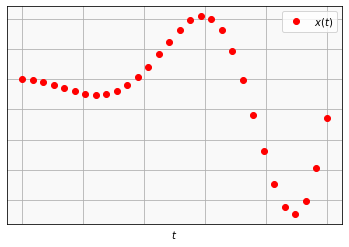

In [3]:
# curva: deslocamento
plotting(x,y,'or','$x(t)$')

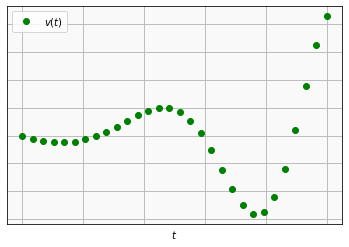

In [4]:
# curva: velocidade
plotting(x,dy,'og','$v(t)$')

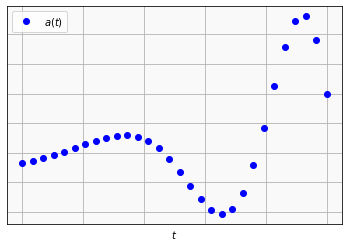

In [5]:
# curva: aceleração
plotting(x,dy2,'ob','$a(t)$')

## Derivada numérica progressiva e regressiva (primeira ordem)

h=0.010
f'e(1.2) = 0.36235775
f'p(1.2) = 0.35769156
f'r(1.2) = 0.36701187
f'c(1.2) = 0.36235172


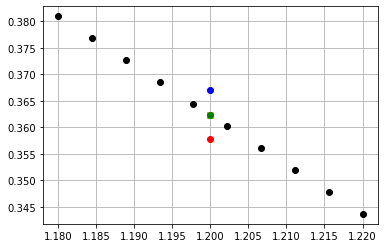

In [14]:
# Exemplo: f(x) = sen(x); 
# Derivada analítica (verdadeira): f'(x=x0) = cos(x0)
x0 = 1.2
h = 0.01
n = 10
x = np.linspace(x0-2*h,x0+2*h,n)

# expressões analíticas de f(x) e f'(x)
f = np.sin(x)
df = np.cos(x)

# valor "exato" de f'(x) no ponto x=x0
dfe = np.cos(x0)

dfp = (np.sin(x0+h) - np.sin(x0))/h       # DF progressiva
dfr = (np.sin(x0) - np.sin(x0-h))/h       # DF regressiva
dfc = (np.sin(x0+h) - np.sin(x0-h))/(2*h) # DF centrada

plt.plot(x,df,'ok') # derivada exata
plt.plot(x0,dfe,'sy') # derivada exata no ponto x0
plt.plot(x0,dfp,'or') # derivada numérica PROGRESSIVA no ponto x0 
plt.plot(x0,dfr,'ob') # derivada numérica REGRESSIVA no ponto x0 
plt.plot(x0,dfc,'og') # derivada numérica CENTRADA no ponto x0 
plt.grid(True)

print('h={0:.3f}'.format(h))
print('f\'e({0:g}) = {1:.8f}'.format(x0,dfe))
print('f\'p({0:g}) = {1:.8f}'.format(x0,dfp))
print('f\'r({0:g}) = {1:.8f}'.format(x0,dfr))
print('f\'c({0:g}) = {1:.8f}'.format(x0,dfc))

### Comparando resultados

**Exemplo:** considere a função $f(x) = \frac{2^x}{x}$. Calcule a segunda derivada em $x=2$ numericamente com a fórmula de diferença centrada a 3 pontos usando:

- Os pontos $x = 1.8$, $x = 2$ e $x = 2.2$.
- Os pontos $x = 1.9$, $x = 2$ e $x = 2.1$.

Compare os resultados com a derivada analítica.

#### Solução

Vamos primeiro computar a seguda derivada analítica de $f(x)$ por computação simbólica.

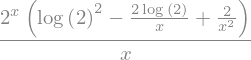

In [24]:
from sympy.abc import x 
sy.init_printing()

# função
f = 2**x/x

# derivada segunda
d2fdx2 = sy.diff(f,x,2)
d2fdx2

In [25]:
# derivada em x = 2 
d2fdx2_p2 = d2fdx2.subs(x,2)

In [26]:
# valor numérico
d2fdx2_p2_num = float(d2fdx2_p2)
d2fdx2_p2_num 

Agora, vamos montar uma função para a fórmula da segunda derivada a 3 pontos (supondo que os pontos dados sejam igualmente espaçados:

In [27]:
# função 
def der_num_2(x1,x2,x3):
    d2fdx2_num = lambda x1,x2,x3: (f.subs(x,x1) - 2*f.subs(x,x2) + f.subs(x,x3))/(x2 - x1)**2
    return float(d2fdx2_num(x1,x2,x3))

Aplicamos a nossa aproximação numérica ao primeiro conjunto de pontos para estimar a derivada numérica no ponto $x=2$ por diferença centrada.

In [28]:
df2_1 = der_num_2(1.8,2.0,2.2)
df2_1

Em seguida, aplicamos a nossa aproximação numérica ao segundo conjunto de pontos:

In [29]:
df2_2 = der_num_2(1.9,2.0,2.1)
df2_2

Esperamos que o segundo conjunto de pontos nos dê uma estimativa mais próxima para a derivada analítica já que os pontos estão mais próximos um do outro. Para verificar isto, vamos medir o erro relativo percentual entre as derivadas numéricas e a derivada analítica.

In [30]:
# erro relativo percentual 
erp = lambda v,va: abs(v-va)/abs(v)*100

# erro para o grupo 1
print('erro relativo percentual 1: ' + str(erp(d2fdx2_p2_num,df2_1)) + '%' )

# erro para o grupo 2
print('erro relativo percentual 2: ' + str(erp(d2fdx2_p2_num,df2_2)) + '%' )

erro relativo percentual 1: 0.49948640831095764%
erro relativo percentual 2: 0.12404011077131777%
